In [2]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import itertools

plt.style.use('ggplot')

In [141]:
def read_cum_res(folder_name):
    with open(os.path.join(folder_name,"validationResults.pickle"), 'rb') as file_pi:
        results = pickle.load(file_pi)
    return results

def read_train_res(folder_name, k_idx=1):
#     with open(os.path.join(folder_name,f"history_kIdx{k_idx}.pickle"), 'rb') as file_pi:
    with open(os.path.join(folder_name,f"history.pickle"), 'rb') as file_pi:
        results = pickle.load(file_pi)
    return results

def plot_cum_Res(folder_names, labels, k_idx=1):
    
    for folder_idx, name in enumerate(folder_names):
        results = read_train_res(name, k_idx=k_idx)
        
        plt.plot(results['acc'])
        plt.plot(results['val_acc'])
    
    plt.title('ImgAug = False')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    legends_sub = ['train', 'test']
    plt.legend([label+', '+sub for sub in legends_sub for label in labels], loc='upper left')
    
    plt.show()

def plot_history_Res(folder_names, labels, k_idx=1):
      
    plt.figure()
    
    for folder_idx, name in enumerate(folder_names):
        results = read_train_res(name, k_idx=k_idx)
        
        plt.plot(results['accuracy'])
        plt.plot(results['val_accuracy'])
    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xticks(np.arange(len(results['accuracy'])), np.arange(1, len(results['accuracy'])+1))

    legends_sub = ['train', 'test']
    legends = [label+', '+sub for sub in legends_sub for label in labels]
    plt.legend(legends_sub, loc='upper left')
    
    plt.show()

def plot_history_Res_loss(folder_names, labels, k_idx=1):
      
    plt.figure()
    
    for folder_idx, name in enumerate(folder_names):
        results = read_train_res(name, k_idx=k_idx)
        
        plt.plot(results['loss'])
        plt.plot(results['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.xticks(np.arange(len(results['accuracy'])), np.arange(1, len(results['accuracy'])+1))

    
    legends_sub = ['train', 'test']
    legends = [label+', '+sub for sub in legends_sub for label in labels]
    plt.legend(legends_sub, loc='upper left')
    
    plt.show()

In [20]:
labels = ['batch = 32', 'batch = 64']
legends_sub = ['train', 'test']
[label+', '+sub for sub in legends_sub for label in labels]

['batch = 32, train',
 'batch = 64, train',
 'batch = 32, test',
 'batch = 64, test']

In [114]:
imgAugment = False
n_inst = 871
n_cats = 5
batch_size = 128
learning_rate = 1e-3
dir_name = f"runningInfo_habitBreaker_imgAug{imgAugment}_n{n_inst}" \
           f"_ncats{n_cats}_batchSize{batch_size}_learnRate{learning_rate}"
results = read_cum_res(dir_name)
np.mean(results['val_acc'])

0.8390440762042999

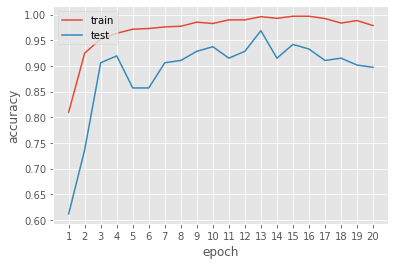

In [161]:
tuning_pars = {'batch_size': [32], 'learning_rate':[1e-4]}
keys, values = zip(*tuning_pars.items())
permutations_dicts = list(itertools.product(*values))
imgAug = False
dir_names = [
    f"runningInfo_habitBreaker_imgAug{imgAug}_n{n_inst}" \
    f"_ncats{n_cats}_batchSize{batch_size}_learnRate{learning_rate}"
    
]
n_inst = 424
n_cats = 6
dir_names = [f"finalModel_n{n_inst}_{n_cats}cats"]

labels = [
    f"batch = {batch_size}, eta = {learning_rate}"
    for (batch_size, learning_rate) in permutations_dicts
]

plot_history_Res(dir_names, labels, k_idx=1)

In [163]:
results = read_train_res(f"finalModel_n{n_inst}_{n_cats}cats")

In [168]:
results['val_loss'][12]

0.22524425387382507

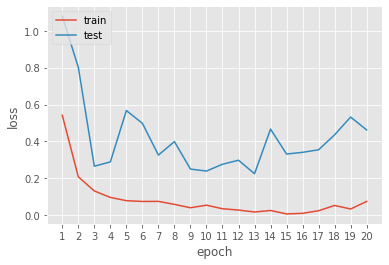

In [162]:
plot_history_Res_loss(dir_names, labels, k_idx=1)

In [167]:
np.argmax(results['val_accuracy'])

12